In [251]:
#import numpy, pandas, and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima_model import ARMA

In [3]:
mlb_batting = pd.read_csv('MLBPlayoffDataBatting.csv', index_col = 0)

In [5]:
#Coverting column to their original data types
mlb_bat = pd.to_datetime(mlb_batting['Date'],errors='coerce')
pd.to_numeric(mlb_batting['Gm#'],errors='coerce')
pd.to_numeric(mlb_batting['PA'],errors='coerce')
pd.to_numeric(mlb_batting['AB'],errors='coerce')
pd.to_numeric(mlb_batting['R'],errors='coerce')
pd.to_numeric(mlb_batting['H'],errors='coerce')
pd.to_numeric(mlb_batting['2B'],errors='coerce')
pd.to_numeric(mlb_batting['3B'],errors='coerce')
pd.to_numeric(mlb_batting['HR'],errors='coerce')
pd.to_numeric(mlb_batting['RBI'],errors='coerce')
pd.to_numeric(mlb_batting['BB'],errors='coerce')
pd.to_numeric(mlb_batting['IBB'],errors='coerce')
pd.to_numeric(mlb_batting['SO'],errors='coerce')
pd.to_numeric(mlb_batting['HBP'],errors='coerce')
pd.to_numeric(mlb_batting['SH'],errors='coerce')
pd.to_numeric(mlb_batting['SF'],errors='coerce')
pd.to_numeric(mlb_batting['ROE'],errors='coerce')
pd.to_numeric(mlb_batting['GDP'],errors='coerce')
pd.to_numeric(mlb_batting['SB'],errors='coerce')
pd.to_numeric(mlb_batting['CS'],errors='coerce')
pd.to_numeric(mlb_batting['WPA'],errors='coerce')
pd.to_numeric(mlb_batting['RE24'],errors='coerce')
pd.to_numeric(mlb_batting['aLI'],errors='coerce')
pd.to_numeric(mlb_batting['LOB'],errors='coerce')
pd.to_numeric(mlb_batting['#'],errors='coerce')
pd.to_numeric(mlb_batting['Attendance'],errors='coerce')
pd.to_numeric(mlb_batting['GmLen'],errors='coerce')

Rk
1       180
2       180
3       237
4       237
5       440
6       440
7       192
8       192
9       232
10      232
11      195
12      195
13      214
14      214
15      212
16      212
17      273
18      273
19      215
20      215
21      232
22      232
23      315
24      315
25      205
26      205
27      225
28      225
29      243
30      243
       ... 
1253    168
1254    230
1255    230
1256    168
1257    189
1258    322
1259    222
1260    222
1261    322
1262    189
1263    160
1264    192
1265    192
1266    160
1267    182
1268    221
1269    221
1270    182
1271    196
1272    186
1273    195
1274    195
1275    196
1276    186
1277    214
1278    252
1279    184
1280    184
1281    252
1282    214
Name: GmLen, Length: 1282, dtype: int64

In [6]:
#Extracting year from datetime type and inserting it as its own column
mlb_batting['year'] = mlb_bat.dt.year

#Creating a new column for batting average
mlb_batting['BA'] = mlb_batting['H']/mlb_batting['AB']

#Creating a new column for on-base percentage
mlb_batting['OBP'] = (mlb_batting['H'] + mlb_batting['BB'] + mlb_batting['IBB'] + mlb_batting['HBP'])/mlb_batting['PA']

In [7]:
#Creating Sub-DataFrames for each World Series winning team
BOS2018 = mlb_batting.loc[(mlb_batting['Tm'] == 'BOS') & mlb_batting['year'].isin([2018])]
HOU2017 = mlb_batting.loc[(mlb_batting['Tm'] == 'HOU') & mlb_batting['year'].isin([2017])]
CHC2016 = mlb_batting.loc[(mlb_batting['Tm'] == 'CHC') & mlb_batting['year'].isin([2016])]
KCR2015 = mlb_batting.loc[(mlb_batting['Tm'] == 'KCR') & mlb_batting['year'].isin([2015])]
SFG2014 = mlb_batting.loc[(mlb_batting['Tm'] == 'SFG') & mlb_batting['year'].isin([2014])]
BOS2013 = mlb_batting.loc[(mlb_batting['Tm'] == 'BOS') & mlb_batting['year'].isin([2013])]
SFG2012 = mlb_batting.loc[(mlb_batting['Tm'] == 'SFG') & mlb_batting['year'].isin([2012])]
STL2011 = mlb_batting.loc[(mlb_batting['Tm'] == 'STL') & mlb_batting['year'].isin([2011])]
SFG2010 = mlb_batting.loc[(mlb_batting['Tm'] == 'SFG') & mlb_batting['year'].isin([2010])]
NYY2009 = mlb_batting.loc[(mlb_batting['Tm'] == 'NYY') & mlb_batting['year'].isin([2009])]
PHI2008 = mlb_batting.loc[(mlb_batting['Tm'] == 'PHI') & mlb_batting['year'].isin([2008])]
BOS2007 = mlb_batting.loc[(mlb_batting['Tm'] == 'BOS') & mlb_batting['year'].isin([2007])]
STL2006 = mlb_batting.loc[(mlb_batting['Tm'] == 'STL') & mlb_batting['year'].isin([2006])]
CHW2005 = mlb_batting.loc[(mlb_batting['Tm'] == 'CHW') & mlb_batting['year'].isin([2005])]
BOS2004 = mlb_batting.loc[(mlb_batting['Tm'] == 'BOS') & mlb_batting['year'].isin([2004])]
FLA2003 = mlb_batting.loc[(mlb_batting['Tm'] == 'FLA') & mlb_batting['year'].isin([2003])]
ANA2002 = mlb_batting.loc[(mlb_batting['Tm'] == 'ANA') & mlb_batting['year'].isin([2002])]
ARI2001 = mlb_batting.loc[(mlb_batting['Tm'] == 'ARI') & mlb_batting['year'].isin([2001])]
NYY2000 = mlb_batting.loc[(mlb_batting['Tm'] == 'NYY') & mlb_batting['year'].isin([2000])]

In [92]:
#Calculating the mean for each column of statistical data by year
#for x in range(2000, 2019):
    #print(mlb_batting.loc[mlb_batting['year'].isin([x])].mean())

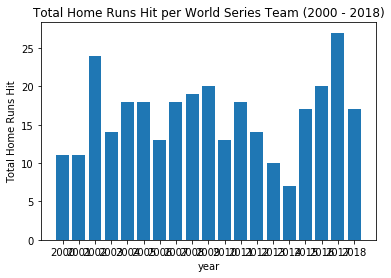

In [9]:
#Dictionary with years as the key and total home runs as the values
HR_dict = {'2000': 11, '2001': 11, '2002': 24, 
           '2003': 14, '2004':18, '2005':18, 
           '2006':13, '2007':18, '2008': 19, 
           '2009':20, '2010': 13, '2011':18, 
           '2012': 14, '2013':10, '2014': 7,
          '2015':17, '2016':20, '2017':27,
          '2018':17}

#Created two separate variables for the dictionary's keys and values
names = list(HR_dict.keys())
values = list(HR_dict.values())

#Creating bar chart with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.bar(range(len(HR_dict)), values, tick_label=names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Total Home Runs Hit per World Series Team (2000 - 2018)')
plt.xlabel('year')
plt.ylabel('Total Home Runs Hit')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

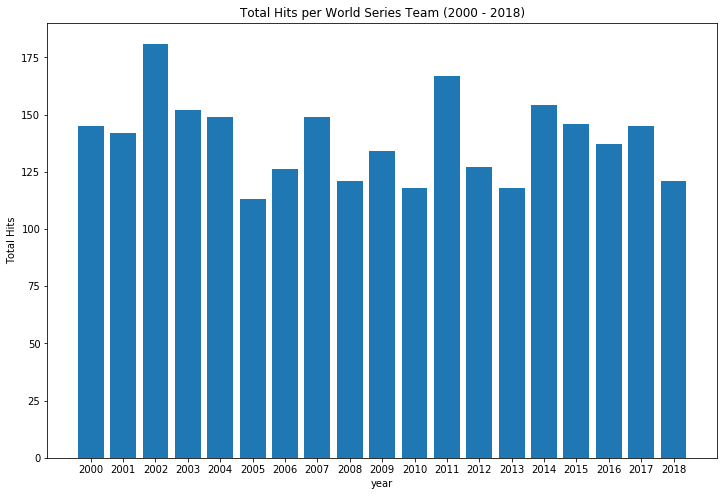

In [10]:
#Dictionary with years as the key and total hits as the values
H_dict = {'2000': 145, '2001': 142, '2002': 181, 
           '2003': 152, '2004':149, '2005':113, 
           '2006':126, '2007':149, '2008': 121, 
           '2009':134, '2010': 118, '2011':167, 
           '2012': 127, '2013':118, '2014': 154,
          '2015':146, '2016':137, '2017':145,
          '2018':121}

#Created two separate variables for the dictionary's keys and values
names = list(H_dict.keys())
values = list(H_dict.values())

#Creating bar chart with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.bar(range(len(H_dict)), values, tick_label=names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Total Hits per World Series Team (2000 - 2018)')
plt.xlabel('year')
plt.ylabel('Total Hits')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

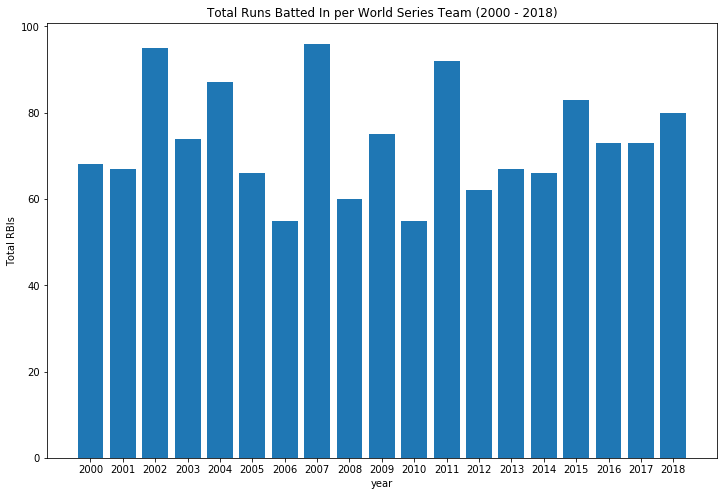

In [11]:
#Dictionary with years as the key and total RBIs as the values
RBI_dict = {'2000':68, '2001':67, '2002':95, 
           '2003':74, '2004':87, '2005':66, 
           '2006':55, '2007':96, '2008':60, 
           '2009':75, '2010':55, '2011':92, 
           '2012':62, '2013':67, '2014':66,
          '2015':83, '2016':73, '2017':73,
          '2018':80}

#Created two separate variables for the dictionary's keys and values
names = list(RBI_dict.keys())
values = list(RBI_dict.values())

#Creating bar chart with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.bar(range(len(RBI_dict)), values, tick_label=names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Total Runs Batted In per World Series Team (2000 - 2018)')
plt.xlabel('year')
plt.ylabel('Total RBIs')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

In [84]:
# print(mlb_batting.loc[(mlb_batting['year'] == 2018) & mlb_batting['BA']].sum())

In [214]:
#Creating dictionaries for average playoff batting average, on-base percentage, and home runs each season's playoffs.
BA_dict = {'2000':0.239, '2001':0.227, '2002':0.273,
          '2003':.238, '2004':.258, '2005':.251,
          '2006':.245, '2007':.254, '2008':.246,
          '2009':.245, '2010':.225, '2011':.250,
          '2012':.222, '2013':.227, '2014':.236,
          '2015':.225, '2016':.219, '2017':.216,
          '2018':.216}

OBP_dict = {'2000':0.329, '2001':0.294, '2002':0.343,
          '2003':.320, '2004':.338, '2005':.32,
          '2006':.321, '2007':.335, '2008':.329,
          '2009':.325, '2010':.295, '2011':.331,
          '2012':.288, '2013':.300, '2014':.301,
          '2015':.291, '2016':.289, '2017':.300,
          '2018':.306}

HR2_dict = {'2000':0.726, '2001':0.929, '2002':1.294,
          '2003':.961, '2004':1.471, '2005':1,
          '2006':1, '2007':1.125, '2008':1.156,
          '2009':1.05, '2010':.921, '2011':1.263, 
          '2012':.824, '2013':.724, '2014':.891,
          '2015':1.264, '2016':1.014, '2017':1.368,
          '2018':1.076}

#Creating a dictionary for total strikeouts for each year's playoffs.
K_dict = {'2000':440, '2001':522, '2002':443,
          '2003':579, '2004':484, '2005':382,
          '2006':367, '2007':439, '2008':497,
          '2009':445, '2010':531, '2011':583, 
          '2012':622, '2013':654, '2014':482,
          '2015':653, '2016':630, '2017':699,
          '2018':635}

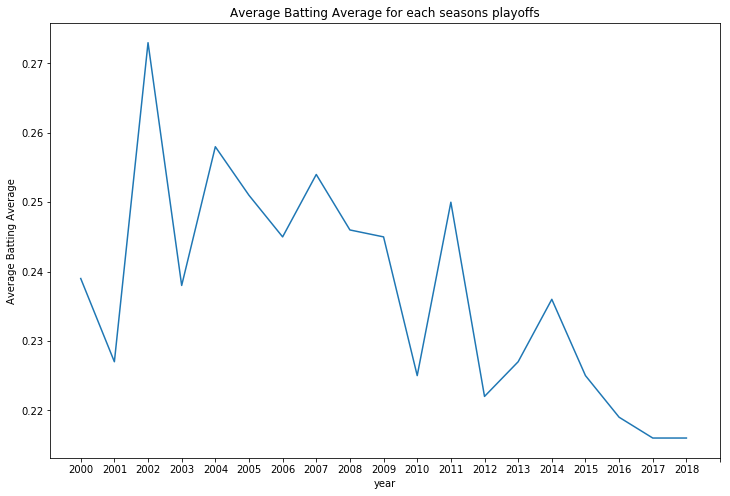

In [222]:
#Created two separate variables for the dictionary's keys and values
names = list(BA_dict.keys())
values = list(BA_dict.values())

#Creating a time series with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.plot(range(len(BA_dict)), values, label='Bat. Avg.')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Average Batting Average for each seasons playoffs')
plt.xlabel('year')
plt.ylabel('Average Batting Average')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

In [268]:
#Creating a pandas DataFrame from Batting Average dictionary values
df_BA = pd.DataFrame(list(BA_dict.values()))

#Creating a moving-average model and fitting the model to forecast playoff batting average for 2019
model = ARMA(df_BA, order=(0, 1))
model_fit = model.fit()

BA_predict = model_fit.predict(len(df_BA))
print(BA_predict)

19    0.234657
dtype: float64


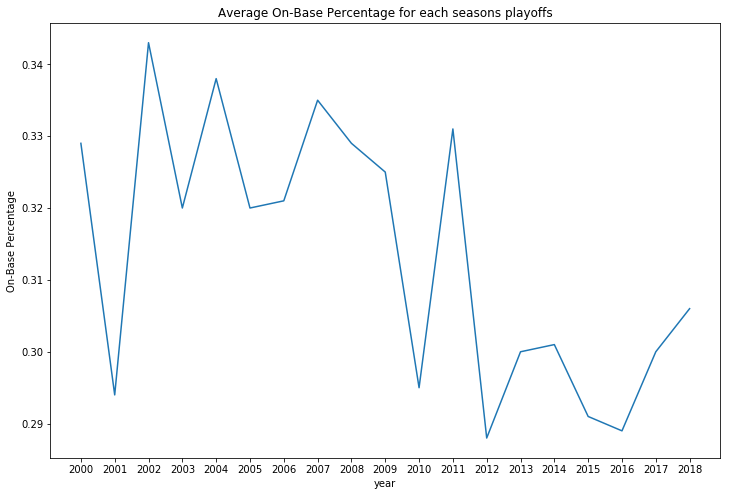

In [95]:
#Created two separate variables for the dictionary's keys and values
names = list(OBP_dict.keys())
values = list(OBP_dict.values())

#Creating a time series with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.plot(range(len(OBP_dict)), values)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Average On-Base Percentage for each seasons playoffs')
plt.xlabel('year')
plt.ylabel('On-Base Percentage')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

In [262]:
#Creating a pandas DataFrame from On-Base Percentage dictionary values
df_OBP = pd.DataFrame(list(OBP_dict.values()))

#Creating a moving-average model and fitting the model to forecast playoff on-base percentage for 2019
model = ARMA(df_OBP, order=(5, 1))
model_fit = model.fit()

OBP_predict = model_fit.predict(len(df_OBP))
print(OBP_predict)

19    0.302419
dtype: float64


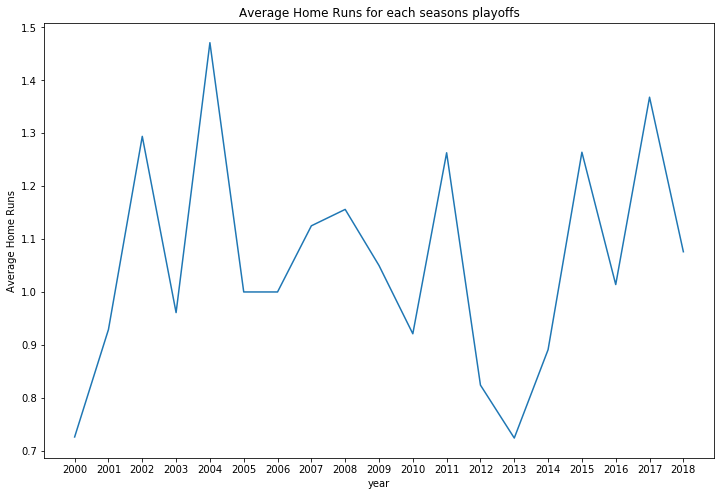

In [96]:
#Created two separate variables for the dictionary's keys and values
names = list(HR2_dict.keys())
values = list(HR2_dict.values())

#Creating a time series with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.plot(range(len(HR2_dict)), values)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Average Home Runs for each seasons playoffs')
plt.xlabel('year')
plt.ylabel('Average Home Runs')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

In [260]:
#Creating a pandas DataFrame from Average Home Runs dictionary values
df_HR2 = pd.DataFrame(list(HR2_dict.values()))

#Creating a moving-average model and fitting the model to forecast average home runs for 2019
model = ARMA(df_HR2, order=(5, 1))
model_fit = model.fit()

HR2_predict = model_fit.predict(len(df_HR2))
print(HR2_predict)

19    1.159934
dtype: float64


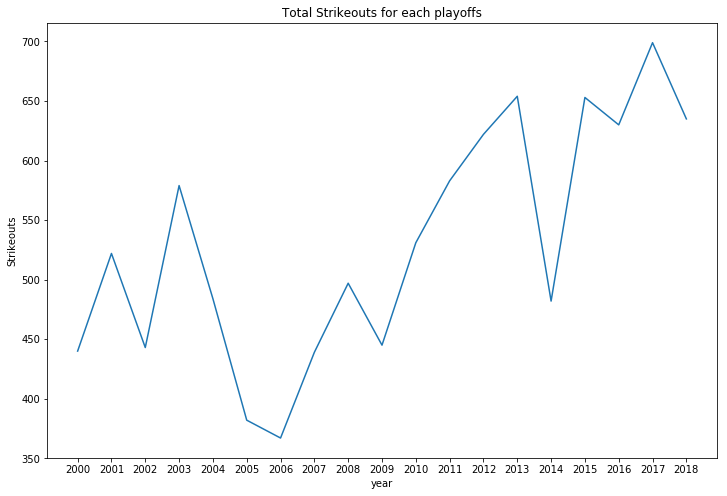

In [97]:
#Created two separate variables for the dictionary's keys and values
names = list(K_dict.keys())
values = list(K_dict.values())

#Creating a time series with the dictionary's keys and values & the key names as the tick names on the x-axis
plt.plot(range(len(K_dict)), values)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], names)

#Creating a title, x-axis label, & y-axis label for the chart
plt.title('Total Strikeouts for each playoffs')
plt.xlabel('year')
plt.ylabel('Strikeouts')

#Adjusting the size of chart so the x-axis labels do not overlap and are spaced properly
plt.rcParams['figure.figsize'] = (12, 8)

plt.show()

In [261]:
#Creating a pandas DataFrame from Total Strikeouts dictionary values
df_K = pd.DataFrame(list(K_dict.values()))

#Creating a moving-average model and fitting the model to forecast playoff Strikeouts for 2019
model = ARMA(df_K, order=(5, 1))
model_fit = model.fit()

K_predict = model_fit.predict(len(df_K))
print(K_predict)

19    638.236875
dtype: float64
